<a href="https://colab.research.google.com/github/FranciscoNav/springboard/blob/main/Principal_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis for Data Visualization
---

In [8]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [9]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
speciesDict = {0: 'setosa',1: 'versicolor', 2:'virginica'}

df.loc[:,'target'] = df.loc[:,'target'].apply(lambda x: speciesDict[x])

<ipython-input-10-f856a4e28d71>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versic

In [14]:
# Standardize the data

# Apply Standardization to features matrix x
features = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']
x = df.loc[:,features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)

In [17]:
# PCA Projection to 2D
# The code below projects the original data which is 4 dimensional into 2 dimensions.
# Note that after dimensionality reduction, there usally isn't a particular meanring assigned to each pincipal component

# Make an instance of PCA
pca = PCA(n_components=2)

# Fit and transform the data (PCA is unsupervised so you only need to fit it on your feature matrix)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns= ['principal Components 1', 'principal Components 2'])

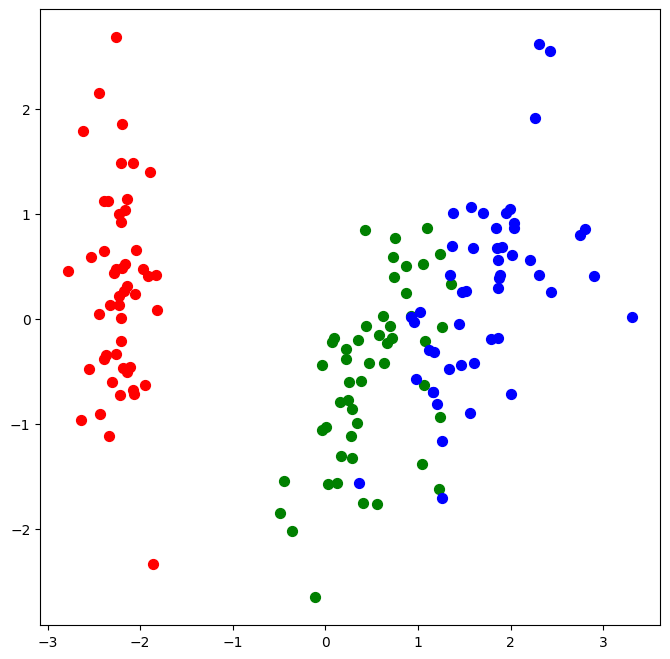

In [29]:
# Visualize 2D Projection
finalDf = pd.concat([principalDf, df[['target']]], axis= 1)

fig, ax = plt.subplots(nrows= 1, ncols= 1, figsize =(8,8))
targets = df.loc[:, 'target'].unique()
colors = ['r','g','b']

for target, color in zip(targets,colors):
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal Components 1'], finalDf.loc[indicesToKeep, 'principal Components 2'], c=color,s=50)

In [22]:
# Explained Variance
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


0.9581320720000166

PCA to speed up machine learning algorithms

In [31]:
# Import Additional Libraries
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the dataset